# **Analisis explotarorio de datos**

# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Importacion de datos

In [2]:
df = pd.read_csv("./dataset/german.csv", sep = ";")
df.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


# Analisis de correlacion

**Matriz de correlacion**

In [3]:
corr_matrix = df.corr()

**Heatmap de correlacion**

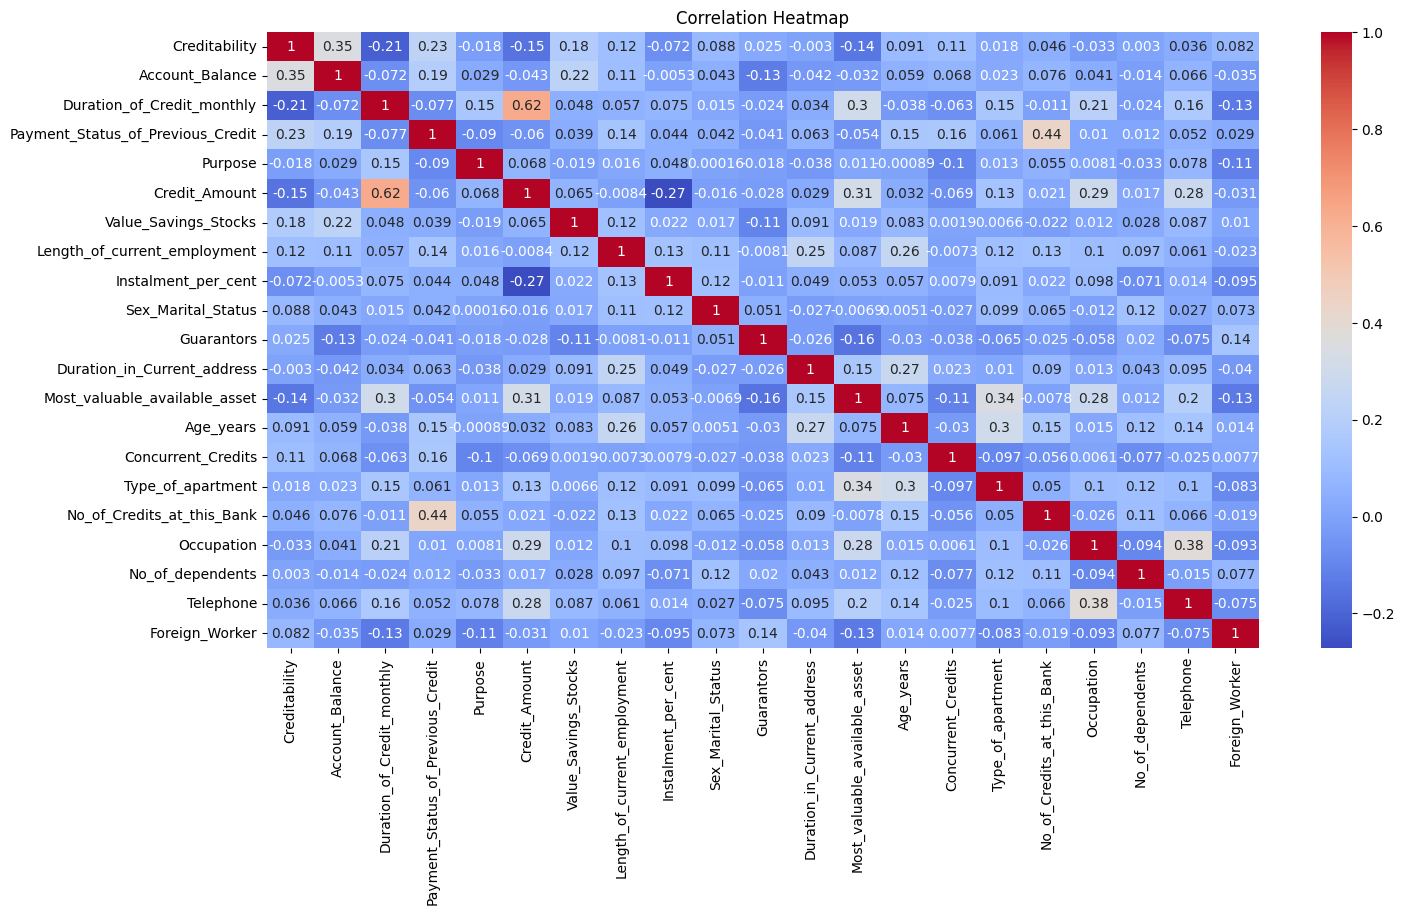

In [4]:
plt.figure(figsize= (16,8)) # Establece el tamaño de la figura
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') 
plt.title('Correlation Heatmap')
plt.show()

**Analisis de P-value**

In [5]:
variables = list(df.columns)[1:]
high_potential_variables = []
mid_potential_variables = []
low_potential_variables = []
for var in variables:
    pearson_coef, p_value = stats.pearsonr(df[var], df['Creditability'])
    if p_value < 0.001:
        print(f'La variable {var} esta fuertemente correlacionada con la variable objetivo Creditability')
        high_potential_variables.append(var)
    elif p_value < 0.05:
        print(f'La variable {var} esta moderadamente correlacionada con la variable objetivo Creditability')
        mid_potential_variables.append(var)
    elif p_value < 0.1:
        print(f'La variable {var} esta debilmente correlacionada con la variable Creditabitity')
        low_potential_variables.append(var)
    else:
        print(f'La variable {var} no esta correlacionada con la variable Creditabitity')
        low_potential_variables.append(var)

La variable Account_Balance esta fuertemente correlacionada con la variable objetivo Creditability
La variable Duration_of_Credit_monthly esta fuertemente correlacionada con la variable objetivo Creditability
La variable Payment_Status_of_Previous_Credit esta fuertemente correlacionada con la variable objetivo Creditability
La variable Purpose no esta correlacionada con la variable Creditabitity
La variable Credit_Amount esta fuertemente correlacionada con la variable objetivo Creditability
La variable Value_Savings_Stocks esta fuertemente correlacionada con la variable objetivo Creditability
La variable Length_of_current_employment esta fuertemente correlacionada con la variable objetivo Creditability
La variable Instalment_per_cent esta moderadamente correlacionada con la variable objetivo Creditability
La variable Sex_Marital_Status esta moderadamente correlacionada con la variable objetivo Creditability
La variable Guarantors no esta correlacionada con la variable Creditabitity
La 

**Variables con mayor potencial predictorio**

In [6]:
display(high_potential_variables)

['Account_Balance',
 'Duration_of_Credit_monthly',
 'Payment_Status_of_Previous_Credit',
 'Credit_Amount',
 'Value_Savings_Stocks',
 'Length_of_current_employment',
 'Most_valuable_available_asset',
 'Concurrent_Credits']

**Variable con moderado potencial predictorio**

In [7]:
display(mid_potential_variables)

['Instalment_per_cent', 'Sex_Marital_Status', 'Age_years', 'Foreign_Worker']

**Variable con bajo potencial predictorio**

In [8]:
display(low_potential_variables)

['Purpose',
 'Guarantors',
 'Duration_in_Current_address',
 'Type_of_apartment',
 'No_of_Credits_at_this_Bank',
 'Occupation',
 'No_of_dependents',
 'Telephone']

# Analisis de distribucion

**Histplot con variables categoricas**

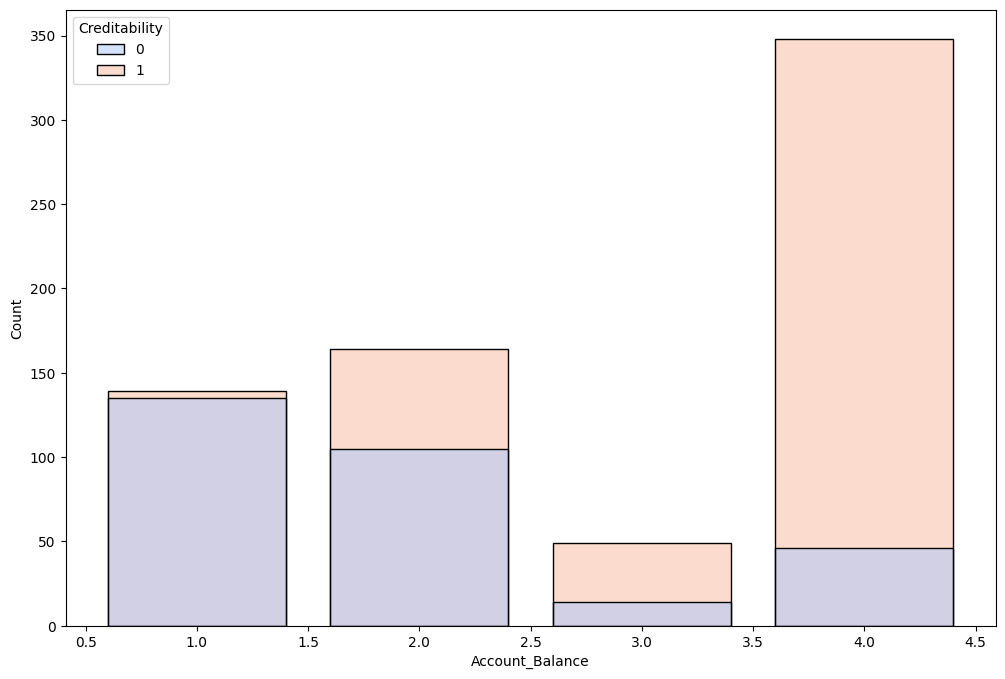

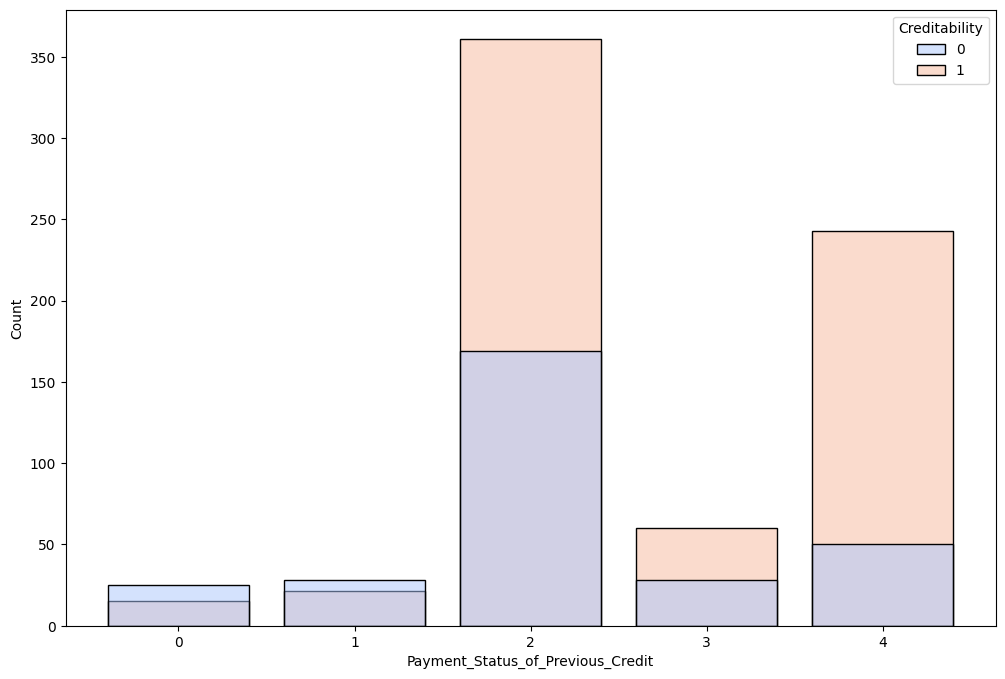

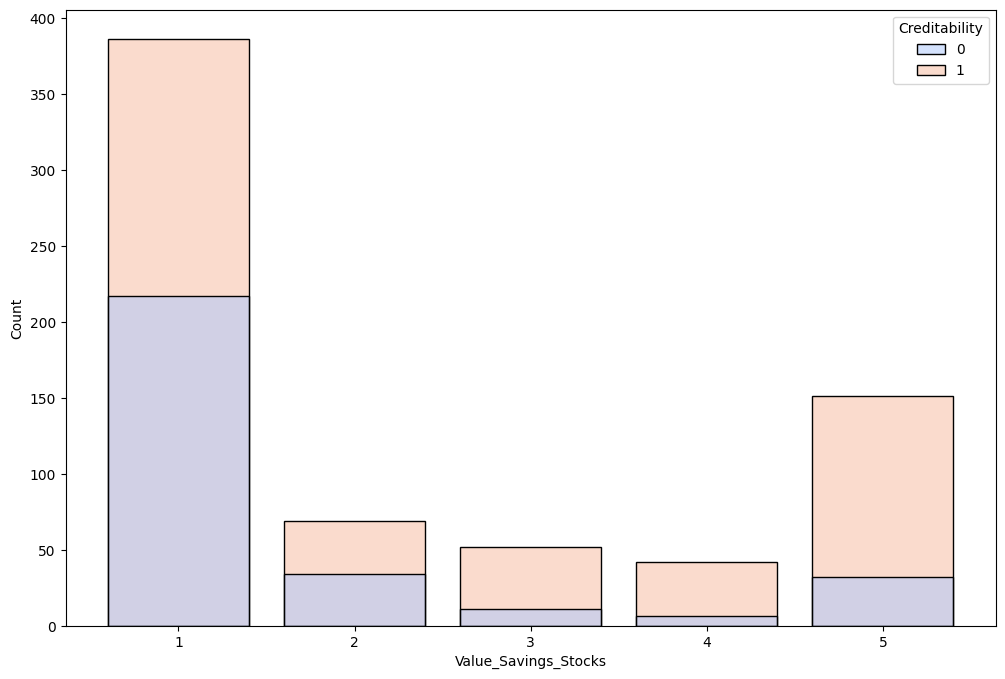

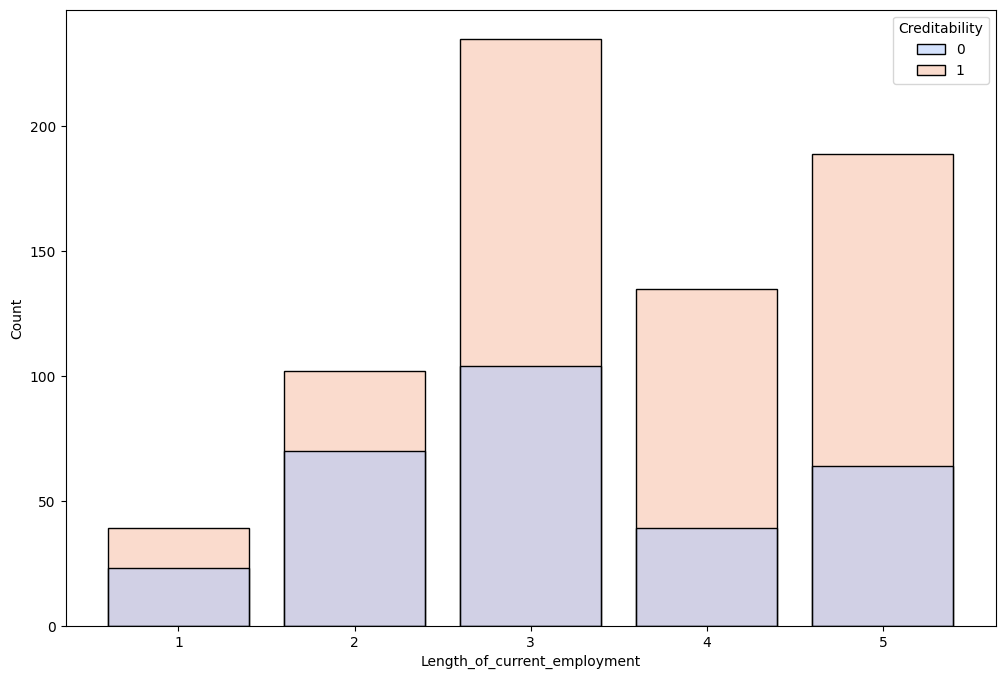

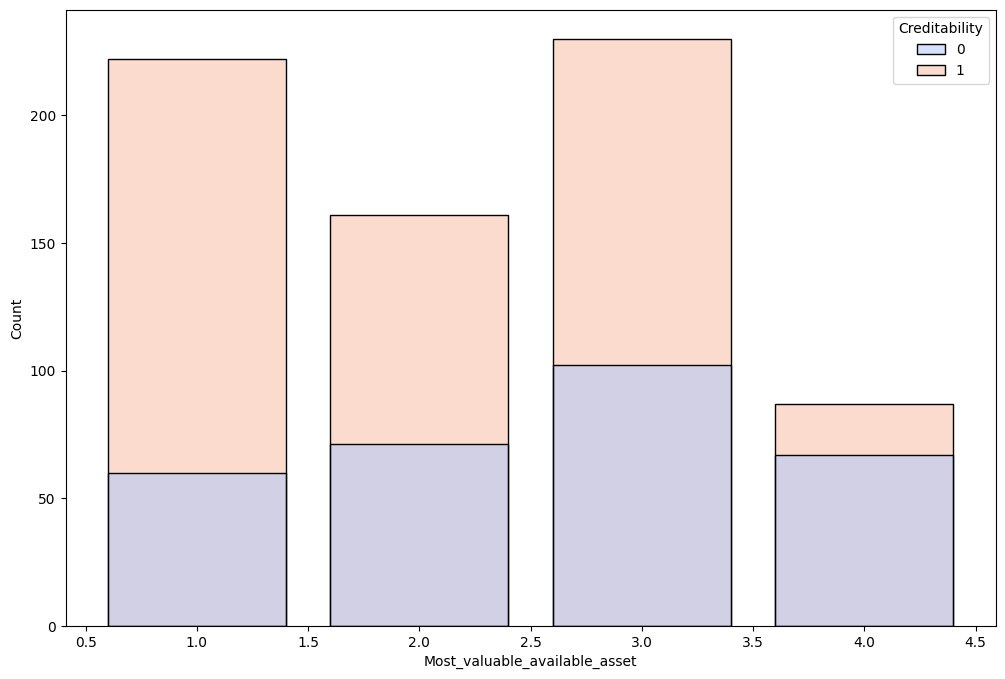

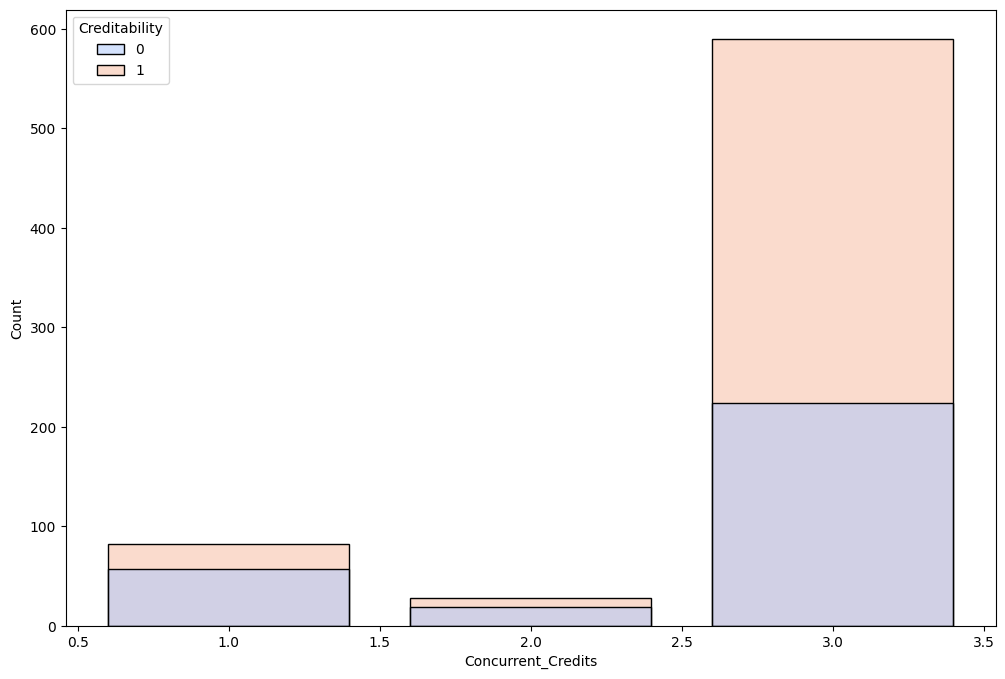

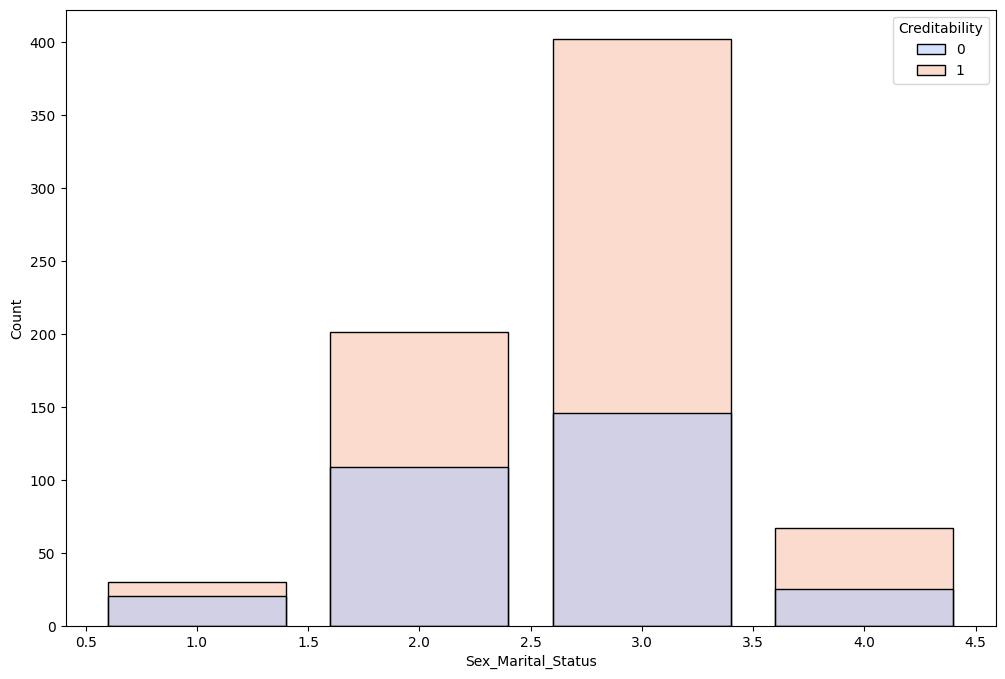

In [27]:
cat_var = [var for var in high_potential_variables if var != 'Credit_Amount' and var != 'Duration_of_Credit_monthly']
cat_var.append("Sex_Marital_Status")
for var in cat_var:
    fig, ax = plt.subplots(figsize = (12, 8))
    sns.histplot(data = df, x = var, hue = 'Creditability',
                 discrete=True, palette="coolwarm", shrink=0.8)
    plt.show()

**Observacion**:

1. Los buenos deudores poseen una cuenta bancaria con suficente saldo para pagar sus deudas. Los malos deudores suelen no tener cuentas bancarias, si las tienen no tienen saldo  y si tienen saldo no lo utilizan para pagar sus deudas. 
2. Los buenos deudores siempre pagan sus cuentas a tiempo o por lo menos las pagan.
3. Los buenos y malos deudores sin ahorros o acciones tiene mayor precensia en comparacion a los que poseen ahorros o acciones.
4. Los buenos y malos deudores aumenta su precensia entre 1 y 4 años en la duracion del empleo. Posterior a los 4 años, la precencia de malos y buenos deudores disminuye, sim embargo aumenta cuan la duracion del empleo es entre 5 y 7 años.
5. Los buenos deudores son los que no poseen creditos en otros bancos o tiendas departamentales.
6. Los malos deudores casados suelen pagar sus deudas como los buenos deudores casados. Sin embargo con una menor precensia. 



**Histplot con variables numericas enteras**

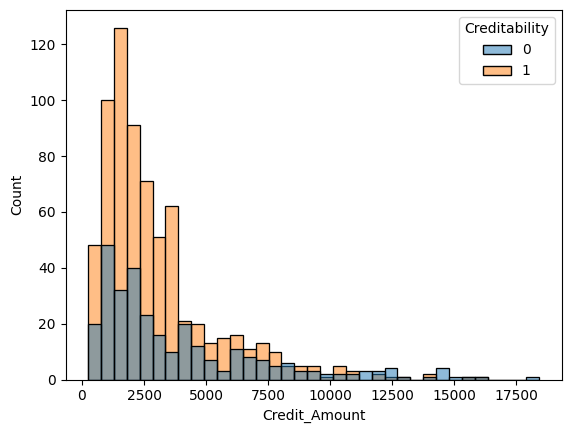

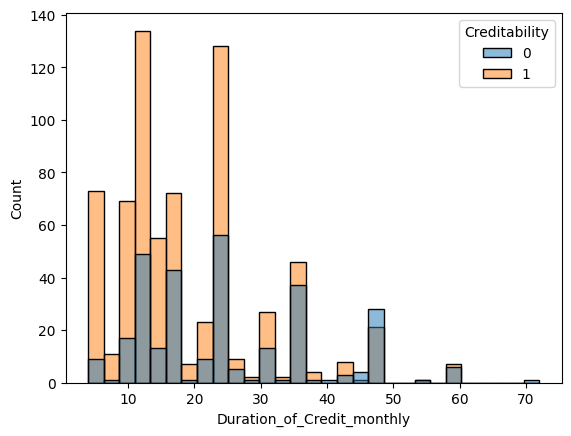

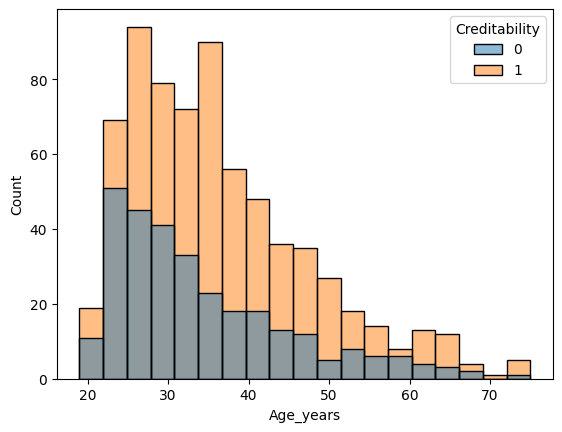

In [25]:
num_var = ['Credit_Amount', 'Duration_of_Credit_monthly', 'Age_years']
for var in num_var:
    sns.histplot(data = df, x = f'{var}', hue = 'Creditability')
    plt.show()

**Observations**: 
1. Los malos deudores toman creditos entre 10 y 40 meses, mientras que los buenos deudores toman entre 10 y 25 meses para pagar sus deudas.
2. Los malos deudores piden un rango de credito mayor en comparacion a los buenos dudores.
3. Los buenos deudores piden sus prestamos a los 25 y 35 años con mayor precensia. Los malos deudores toman sus prestamos a los 23 años con mayor precensia. Normalmente las personas solicitan prestamos a tempranas edades con mayor frecuencia, entre los 21 y 40 años. 

# Guardar dataset 

Elminar variables con bajo potencial predictorio

In [11]:
df = df.drop(low_potential_variables, axis = 1)
df.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Most_valuable_available_asset,Age_years,Concurrent_Credits,Foreign_Worker
0,1,1,18,4,1049,1,2,4,2,2,21,3,1
1,1,1,9,4,2799,1,3,2,3,1,36,3,1
2,1,2,12,2,841,2,4,2,2,1,23,3,1
3,1,1,12,4,2122,1,3,3,3,1,39,3,2
4,1,1,12,4,2171,1,3,4,3,2,38,1,2


Guardar dataset

In [235]:
df.to_csv("german_credit_risk.csv")